In [46]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")

In [65]:
airpass_df = pd.read_csv('AirPassengers.csv')
airpass_df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [66]:
# конвертуємо колонку для pandas в datetime
airpass_df['Month'] = pd.to_datetime(airpass_df['Month'])
airpass_df.set_index('Month', inplace=True)

<AxesSubplot:xlabel='Month'>

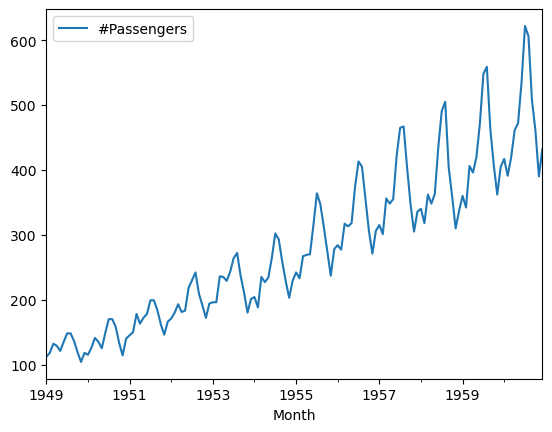

In [67]:
# Перевірка датасету
airpass_df.plot()

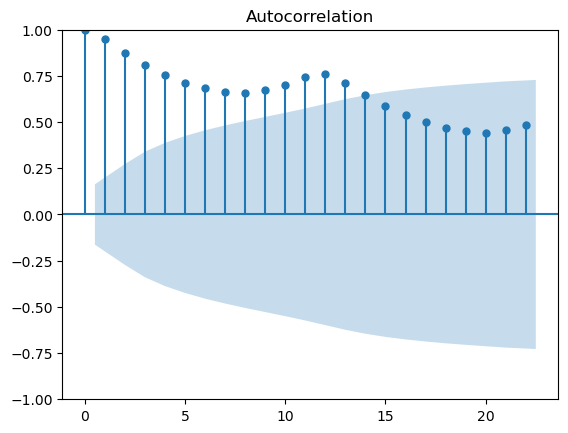

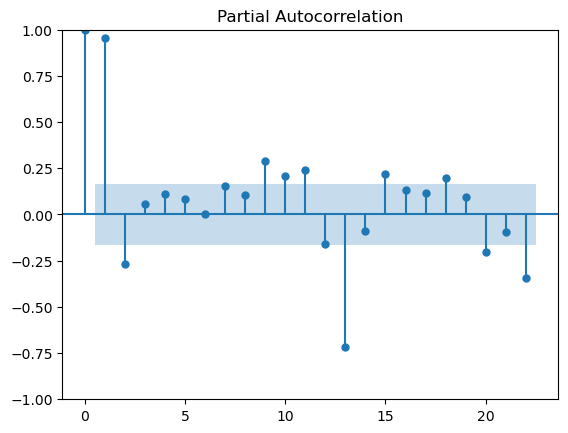

In [68]:
# Визначення автокореляції та часткової автокореляції
plot_acf(airpass_df)
plot_pacf(airpass_df)
plt.show()

<AxesSubplot:xlabel='Month'>

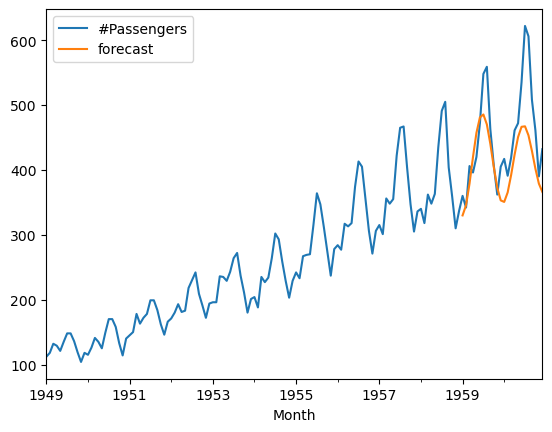

In [69]:
# ARIMA модель
model_arima = ARIMA(airpass_df, order=(2,1,2))
results_arima = model_arima.fit()
airpass_df['forecast'] = results_arima.predict(start=120, end=144, dynamic=True)
airpass_df[['#Passengers', 'forecast']].plot()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.51680D+00    |proj g|=  9.55359D-02

At iterate    5    f=  3.50475D+00    |proj g|=  1.89298D-02

At iterate   10    f=  3.49623D+00    |proj g|=  4.29030D-02

At iterate   15    f=  3.48495D+00    |proj g|=  7.24150D-03

At iterate   20    f=  3.47970D+00    |proj g|=  1.27677D-02

At iterate   25    f=  3.47869D+00    |proj g|=  1.28045D-03

At iterate   30    f=  3.47755D+00    |proj g|=  1.49979D-02

At iterate   35    f=  3.47051D+00    |proj g|=  1.95497D-02

At iterate   40    f=  3.46283D+00    |proj g|=  1.03635D-02

At iterate   45    f=  3.46057D+00    |proj g|=  6.06135D-03

At iterate   50    f=  3.45967D+00    |proj g|=  7.35260D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

<AxesSubplot:xlabel='Month'>

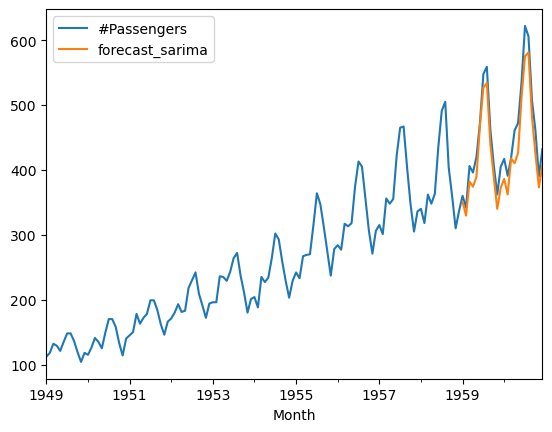

In [70]:
# SARIMA модель
model_sarima = SARIMAX(airpass_df['#Passengers'], order=(2,1,2), seasonal_order=(2,1,2,12))
results_sarima = model_sarima.fit()

airpass_df['forecast_sarima'] = results_sarima.predict(start=120, end=144, dynamic=True)
airpass_df[['#Passengers', 'forecast_sarima']].plot()

In [71]:
# Порівняння метрик
mse_arima = mean_squared_error(airpass_df['#Passengers'][120:], airpass_df['forecast'][120:])
mse_sarima = mean_squared_error(airpass_df['#Passengers'][120:], airpass_df['forecast_sarima'][120:])
print(f'MSE for ARIMA: {mse_arima}')
print(f'MSE for SARIMA: {mse_sarima}')

MSE for ARIMA: 3857.710997137692
MSE for SARIMA: 760.7279759057634
